In [1]:
import pandas as pd
apple_csv = pd.read_csv('Apple.csv')
amazon_csv = pd.read_csv('Amazon.csv')
google_csv = pd.read_csv('Google.csv')
micro_csv = pd.read_csv('Microsoft.csv')
netflix_csv = pd.read_csv('Netflix.csv')

apple_csv.columns = [f'Apple_{col}' if col != 'Date' else 'Date' for col in apple_csv.columns]
amazon_csv.columns = [f'Amazon_{col}' if col != 'Date' else 'Date' for col in amazon_csv.columns]
google_csv.columns = [f'Google_{col}' if col != 'Date' else 'Date' for col in google_csv.columns]
micro_csv.columns = [f'Microsoft_{col}' if col != 'Date' else 'Date' for col in micro_csv.columns]
netflix_csv.columns = [f'Netflix_{col}' if col != 'Date' else 'Date' for col in netflix_csv.columns]

merged_df = apple_csv
merged_df = pd.merge(merged_df, amazon_csv, on='Date', how='outer')
merged_df = pd.merge(merged_df, google_csv, on='Date', how='outer')
merged_df = pd.merge(merged_df, micro_csv, on='Date', how='outer')
merged_df = pd.merge(merged_df, netflix_csv, on='Date', how='outer')

# converts to proper 
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
columns_without_date = merged_df.drop(columns=['Date']).columns.tolist()
merged_df[columns_without_date] = merged_df[columns_without_date].apply(pd.to_numeric, errors='coerce')

# remove rows with missing vals
merged_df.dropna(inplace=True)

# makes date as key
merged_df.set_index('Date', inplace=True)

# removes and duplicate rows
merged_df.drop_duplicates(inplace=True)

# extracts only the years we want
df = merged_df[500:2150]

len(df)


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


1650

/var/folders/_1/4ff39r7j7cs78zsqt7mb3tr80000gn/T/ipykernel_10242/2731956976.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{company}_Avg'] = (df[f'{company}_High'] + df[f'{company}_Low']) / 2
/var/folders/_1/4ff39r7j7cs78zsqt7mb3tr80000gn/T/ipykernel_10242/2731956976.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{company}_Avg'] = (df[f'{company}_High'] + df[f'{company}_Low']) / 2
/var/folders/_1/4ff39r7j7cs78zsqt7mb3tr80000gn/T/ipykernel_10242/2731956976.py:15: SettingWithCopyWarning:

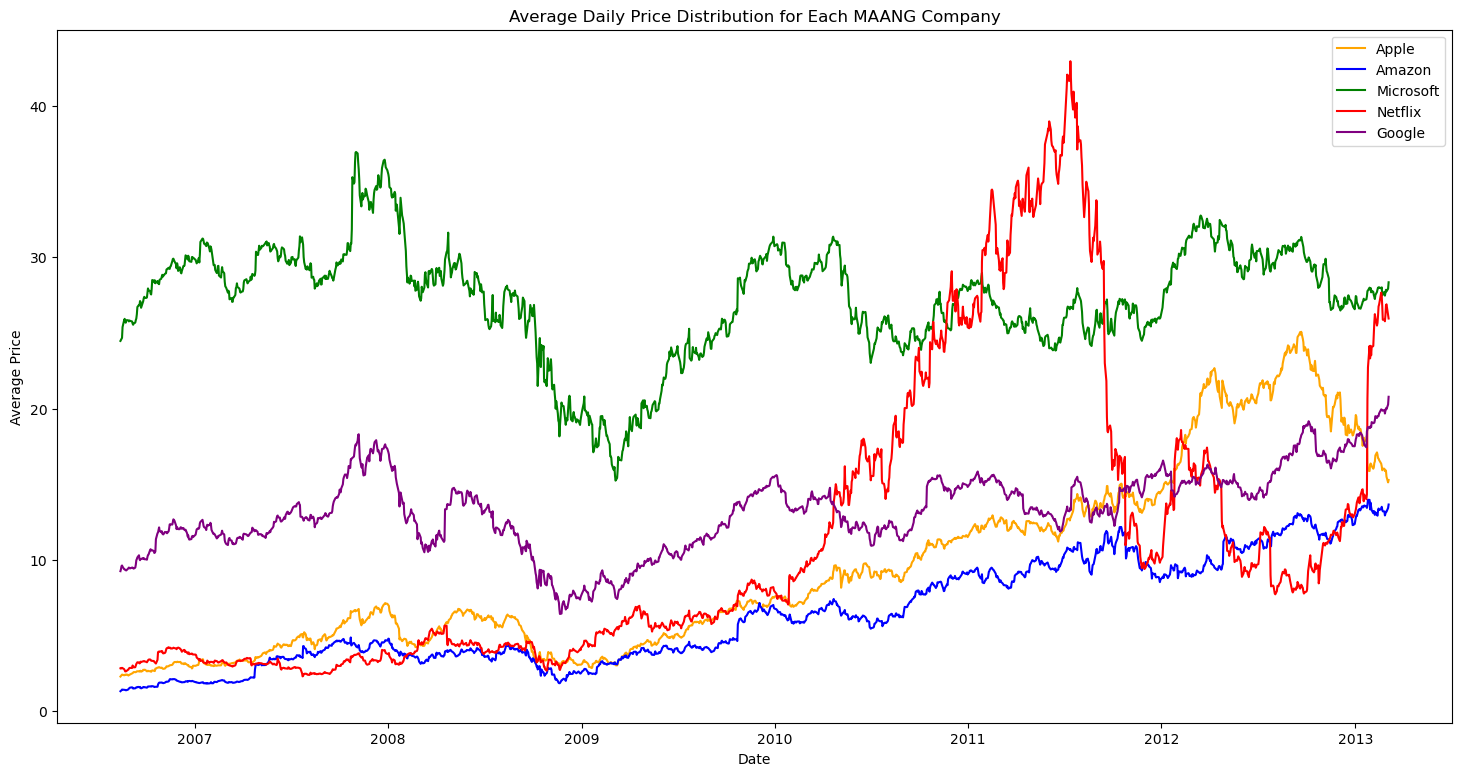

In [2]:
# Line Plot
import matplotlib.pyplot as plt

# dict of companies to line colors
companies = {
    'Apple': 'orange',
    'Amazon': 'blue',
    'Microsoft': 'green',
    'Netflix': 'red',
    'Google': 'purple'
}

# iterates and extracts the company averages per day
for company in companies.keys():
    df[f'{company}_Avg'] = (df[f'{company}_High'] + df[f'{company}_Low']) / 2

# plots the indv company average distributions
plt.figure(figsize=(18, 9))
for company, color in companies.items():
    plt.plot(df.index, df[f'{company}_Avg'], label=company, color=color)

# label and title
plt.title('Average Daily Price Distribution for Each MAANG Company')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.show()

/var/folders/_1/4ff39r7j7cs78zsqt7mb3tr80000gn/T/ipykernel_10242/2419406014.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df.index.year
/var/folders/_1/4ff39r7j7cs78zsqt7mb3tr80000gn/T/ipykernel_10242/2419406014.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df.index.month


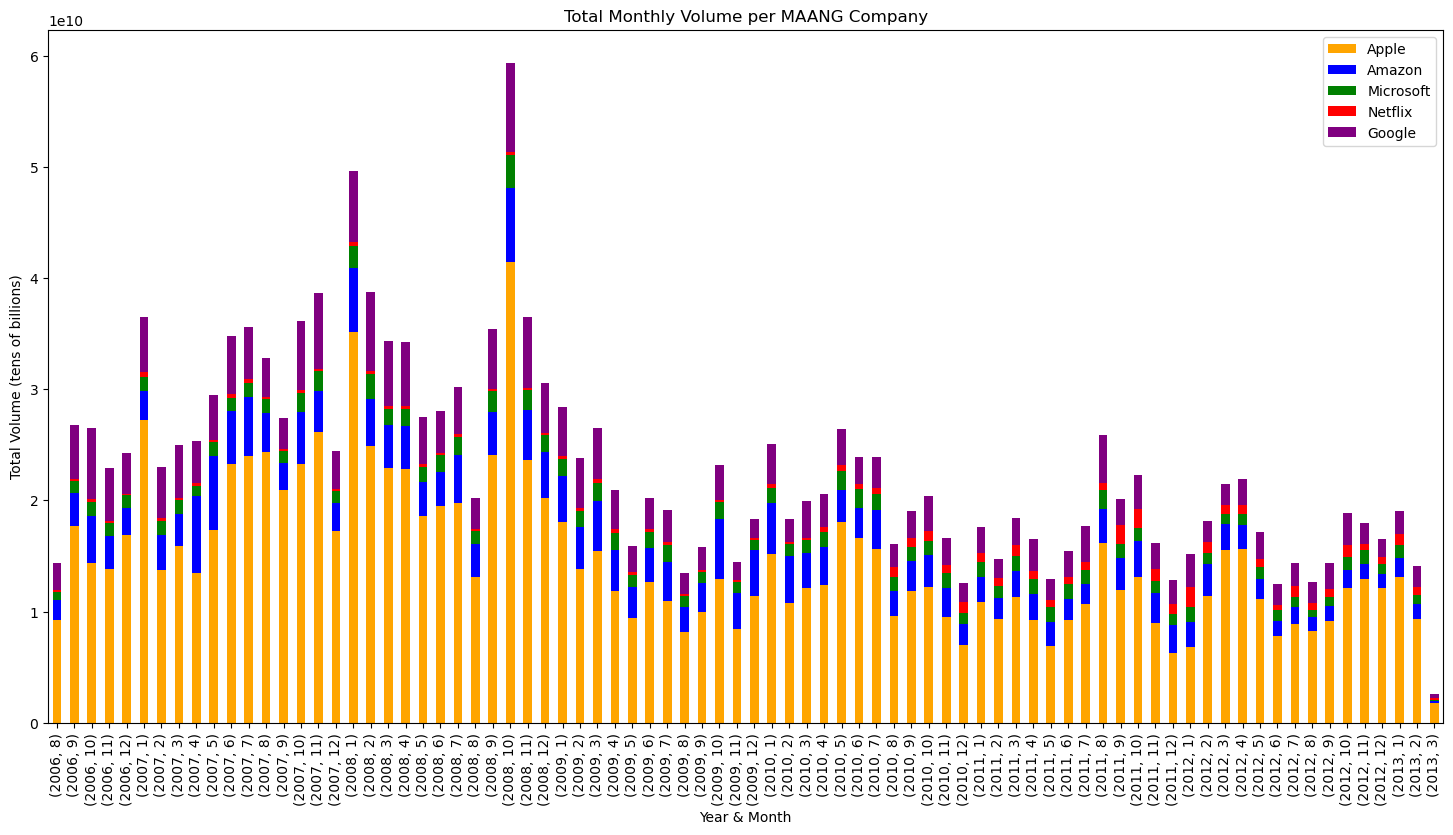

In [3]:
# Stacked Bar Chart for Monthly Volume

# Adding Year and Month columns to the dataframe to aggregate by month
df['Year'] = df.index.year
df['Month'] = df.index.month

# Summing volumes for each company per month, per year
df_monthly_vol = df.groupby(['Year', 'Month']).sum()[[f'{company}_Volume' for company in companies]]

# Plotting the stacked bar chart
df_monthly_vol.plot(kind='bar', stacked=True, figsize=(18,9), color=[companies[company] for company in companies])
plt.title('Total Monthly Volume per MAANG Company')
plt.xlabel('Year & Month')
plt.ylabel('Total Volume (tens of billions)')
plt.legend(companies.keys())
plt.show()

In [4]:
stock_data = pd.read_csv('Stock Headlines.csv', encoding='ISO-8859-1')
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data = stock_data[['Date', 'Top1', 'Top2', 'Top3']]
data_with_top =pd.merge(df, stock_data, on='Date', how='inner')
data_with_top

,Date,Apple_Open,Apple_High,Apple_Low,Apple_Close,Apple_Adj Close,Apple_Volume,Amazon_Open,Amazon_High,Amazon_Low,...,Apple_Avg,Amazon_Avg,Microsoft_Avg,Netflix_Avg,Google_Avg,Year,Month,Top1,Top2,Top3
0,2006-08-14,2.287500,2.329286,2.271429,2.283571,1.943590,717620400,1.3110,1.3530,1.3090,...,2.300358,1.33100,24.475000,2.846429,9.262781,2006,8,"Elektra, Usher Hall, Edinburgh Festival",Athletics: The split in British sprinting that...,"Athletics: Drop the unnecessary theatre, hones..."
1,2006-08-15,2.333571,2.375000,2.314286,2.373214,2.019886,861352800,1.3485,1.3930,1.3310,...,2.344643,1.36200,24.545000,2.865000,9.393167,2006,8,Post terror plot are people still so distrustf...,Letters: Answers to Islam's extremists,Jon Henley's diary
2,2006-08-16,2.396429,2.431071,2.368929,2.427857,2.066394,781284000,1.3985,1.4070,1.3760,...,2.400000,1.39150,24.599999,2.836428,9.596157,2006,8,Scottish league to be restructured,Man questioned over JonBenet murder,World of Blogcraft
3,2006-08-17,2.428571,2.452143,2.399286,2.413929,2.054539,581148400,1.3980,1.4875,1.3915,...,2.425714,1.43950,24.680000,2.875000,9.637875,2006,8,Anti-terror wiretaps ruled illegal,Record passes revive calls for review of exam...,"Goalie's family net £10,000 bet"
4,2006-08-18,2.418214,2.442857,2.402143,2.425357,2.064267,536354000,1.4545,1.4615,1.4110,...,2.422500,1.43625,25.389999,2.857143,9.562159,2006,8,Readers' restaurants: Alfresco in the West Cou...,"Simon Hopkinson reviews Defune, 34 George Stre...",Ryanair chief threatens to sue over security
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645,2013-02-27,16.015356,16.158571,15.737500,15.877500,13.713098,587350400,12.9700,13.2915,12.8430,...,15.948036,13.06725,27.665000,26.182858,19.873758,2013,2,Maldives girl gets 100 lashes for pre-marital ...,Compulsive liar jailed after 11 false rape cla...,Australian Muslim activists lose free speech c...
1646,2013-02-28,15.858929,15.995357,15.764286,15.764286,13.615321,322515200,13.0905,13.3500,13.0315,...,15.879821,13.19075,27.855000,26.831429,20.025191,2013,2,'Marijuana cannon' used to fire drugs over US ...,South Africa shock as 'police dragging' video ...,The Pilot of the Hot Air Balloon that crashed ...
1647,2013-03-01,15.642857,15.649286,15.356429,15.373929,13.278176,552448400,13.1635,13.3300,13.0520,...,15.502858,13.19100,27.750000,26.896429,19.966286,2013,3,Manning statement: Americans had a right to kn...,"Every year in China, 287,000 people end their ...","The 81-story skyscraper is all but invisible, ..."
1648,2013-03-04,15.278571,15.292857,14.964286,15.001786,12.956759,582755600,13.2680,13.6650,13.2070,...,15.128572,13.43600,27.925000,26.195714,20.272016,2013,3,US doctors cure child born with HIV,'Batman' brings in suspect to Bradford police,Japanese father dies sheltering his daughter f...


In [5]:
import seaborn as sns
from textblob import TextBlob

# Define a function to calculate sentiment score
def sentiment_score(text):
    return TextBlob(text).sentiment.polarity

# Calculate sentiment scores for each Top label
for i in range(1, 4):  # Adjust according to the number of Top labels
    data_with_top[f'Top{i}_Sentiment'] = data_with_top[f'Top{i}'].apply(sentiment_score)


# Calculate average sentiment per day
data_with_top['Average_Sentiment'] = data_with_top[[f'Top{i}_Sentiment' for i in range(1, 4)]].mean(axis=1)

# Calculate daily average sentiment and assign it to a new column
daily_avg_sentiment = data_with_top.groupby('Date')['Average_Sentiment'].transform('mean')

data_with_top

,Date,Apple_Open,Apple_High,Apple_Low,Apple_Close,Apple_Adj Close,Apple_Volume,Amazon_Open,Amazon_High,Amazon_Low,...,Google_Avg,Year,Month,Top1,Top2,Top3,Top1_Sentiment,Top2_Sentiment,Top3_Sentiment,Average_Sentiment
0,2006-08-14,2.287500,2.329286,2.271429,2.283571,1.943590,717620400,1.3110,1.3530,1.3090,...,9.262781,2006,8,"Elektra, Usher Hall, Edinburgh Festival",Athletics: The split in British sprinting that...,"Athletics: Drop the unnecessary theatre, hones...",0.000000e+00,-0.333333,-0.200000,-0.177778
1,2006-08-15,2.333571,2.375000,2.314286,2.373214,2.019886,861352800,1.3485,1.3930,1.3310,...,9.393167,2006,8,Post terror plot are people still so distrustf...,Letters: Answers to Islam's extremists,Jon Henley's diary,0.000000e+00,0.000000,0.000000,0.000000
2,2006-08-16,2.396429,2.431071,2.368929,2.427857,2.066394,781284000,1.3985,1.4070,1.3760,...,9.596157,2006,8,Scottish league to be restructured,Man questioned over JonBenet murder,World of Blogcraft,0.000000e+00,0.000000,0.000000,0.000000
3,2006-08-17,2.428571,2.452143,2.399286,2.413929,2.054539,581148400,1.3980,1.4875,1.3915,...,9.637875,2006,8,Anti-terror wiretaps ruled illegal,Record passes revive calls for review of exam...,"Goalie's family net £10,000 bet",-5.000000e-01,0.000000,0.000000,-0.166667
4,2006-08-18,2.418214,2.442857,2.402143,2.425357,2.064267,536354000,1.4545,1.4615,1.4110,...,9.562159,2006,8,Readers' restaurants: Alfresco in the West Cou...,"Simon Hopkinson reviews Defune, 34 George Stre...",Ryanair chief threatens to sue over security,0.000000e+00,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645,2013-02-27,16.015356,16.158571,15.737500,15.877500,13.713098,587350400,12.9700,13.2915,12.8430,...,19.873758,2013,2,Maldives girl gets 100 lashes for pre-marital ...,Compulsive liar jailed after 11 false rape cla...,Australian Muslim activists lose free speech c...,1.625000e-01,-0.400000,0.047619,-0.063294
1646,2013-02-28,15.858929,15.995357,15.764286,15.764286,13.615321,322515200,13.0905,13.3500,13.0315,...,20.025191,2013,2,'Marijuana cannon' used to fire drugs over US ...,South Africa shock as 'police dragging' video ...,The Pilot of the Hot Air Balloon that crashed ...,0.000000e+00,0.000000,0.425000,0.141667
1647,2013-03-01,15.642857,15.649286,15.356429,15.373929,13.278176,552448400,13.1635,13.3300,13.0520,...,19.966286,2013,3,Manning statement: Americans had a right to kn...,"Every year in China, 287,000 people end their ...","The 81-story skyscraper is all but invisible, ...",3.178571e-01,0.000000,0.000000,0.105952
1648,2013-03-04,15.278571,15.292857,14.964286,15.001786,12.956759,582755600,13.2680,13.6650,13.2070,...,20.272016,2013,3,US doctors cure child born with HIV,'Batman' brings in suspect to Bradford police,Japanese father dies sheltering his daughter f...,0.000000e+00,0.000000,0.000000,0.000000


In [18]:
import altair as alt
alt.data_transformers.enable("vegafusion")
data_with_top['Apple_Percentage_Change'] = ((data_with_top['Apple_Close'] - data_with_top['Apple_Open']) / data_with_top['Apple_Open']) * 100
data_with_top['Amazon_Percentage_Change'] = ((data_with_top['Amazon_Close'] -data_with_top['Amazon_Open']) / data_with_top['Amazon_Open']) * 100
data_with_top['Microsoft_Percentage_Change'] = ((data_with_top['Microsoft_Close'] - data_with_top['Microsoft_Open']) / data_with_top['Microsoft_Open']) * 100
data_with_top['Netflix_Percentage_Change'] = ((data_with_top['Netflix_Close'] - data_with_top['Netflix_Open']) / data_with_top['Netflix_Open']) * 100
data_with_top['Google_Percentage_Change'] = ((data_with_top['Google_Close'] - data_with_top['Google_Open']) / data_with_top['Google_Open']) * 100

# Reshape Data for Altair
melted_df = data_with_top.melt(id_vars=['Average_Sentiment'], 
                     value_vars=['Apple_Percentage_Change', 'Amazon_Percentage_Change',
                                 'Microsoft_Percentage_Change', 'Netflix_Percentage_Change',
                                 'Google_Percentage_Change'],
                     var_name='Company', value_name='Percentage_Change')
melted_df = melted_df[melted_df['Average_Sentiment'] != 0.0]

selection = alt.selection_single(fields=['Company'], bind='legend')
chart = alt.Chart(melted_df).mark_circle().encode(
    y='Average_Sentiment:Q',
    x='Percentage_Change:Q',
    color='Company:N',
    tooltip=['Company:N', 'Average_Sentiment:Q', 'Percentage_Change:Q']
).properties(
    title='Percentage Change vs Average Sentiment by Company'
).add_params(selection
            ).transform_filter(selection)

# Display the chart
chart.show()


/var/folders/_1/4ff39r7j7cs78zsqt7mb3tr80000gn/T/ipykernel_10242/279925442.py:17: AltairDeprecationWarning: Deprecated in `altair=5.0.0`. Use selection_point instead.
  selection = alt.selection_single(fields=['Company'], bind='legend')
/Users/mayaprasad/opt/anaconda3/lib/python3.9/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/Users/mayaprasad/opt/anaconda3/lib/python3.9/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/Users/mayaprasad/opt/anaconda3/lib/python3.9/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/

alt.Chart(...)